

# Project: TMDb Movie Data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

In this project, I will be analyzing data associated with the TMDb movie (https://www.kaggle.com/tmdb/tmdb-movie-metadata). Each row corresponds to a movie and includes a range of data about each film. Relevant data to be used in the following analysis include the following variables: 
       - revenue_adj (revenue in terms of 2010 dollars)
       - popularity
       - vote_average
       - runtime
       - genres
       - release_date
       
In particular, I will be interested in the following questions:
       - What's the relationship between revenue and popularity, runtime, vote average
       - What kinds of properties associated with movies that have more popularity? 

Throughout my analysis film revenue will be dependent variable, while popularity, runtime and vote average will be independent variables. For second question, popularity will be dependent variable, while genres, release date and runtime will be independent variables. 

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

Load TMDb movie data into dataframe and display first five rows of data

In [95]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The dataset concluded the movie id, which is the unique identifier for each movie. 
It also had the movie popularity that described the numeric quantity, the budget in which the movie was made, the worldwide revenue generated by the movie, the genre of the movie, the count of votes received, the average ratings the movie received, the adjust revenue and budget of the associated movie based on 2010 dollars, accounting for inflation over time and the basic information of the movie like the title, cast, homepage, director, tagline, overview, runtime, production countries and release date. 

Return a tuple of the dimensions of the dataframe

In [96]:
df.shape


(10866, 21)

From the output of the shape, there has 10866 movies and 21 columns. 

In [97]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the descriptive statistics, we can see that the mean popularity for movies is 0.646, 75% of movies have revenues. The highest adjusted revenue that the movie received is 2.827e+09. The lowest is 0. 
The movie's length is around 102 minutes, and around 200 people vote for the movie after watching. Most movies received ratings from 5.4 to 6.6. The highest rate that the movie received is 9.2, and the lowest rate is 1.5. This dataset contains the movies released from the year 1960 to 2015.   


Displays a summary of the dataframe and include the number of non-null values in each column

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Here are some missing values on imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies. The table below shows the detail of the missing situation. 

In [99]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [100]:
sum(df.duplicated())

1

There is only one duplicate in the data

## Drop non-related columns

Before fill or drop the rows with no values, I will drop some coulumns that I'm not going to use, like imdb_id, homepage,original titlerevenue, budget,vote count cast, director, tagline, overview, keywords and production companies, release year, adjust budget 

In [101]:
df.drop(['imdb_id','homepage','revenue','budget','cast','director','tagline','original_title','budget_adj','release_year','overview','keywords','vote_count','production_companies'], axis = 1,inplace = True)


In [102]:
df.head()

,id,popularity,runtime,genres,release_date,vote_average,revenue_adj
0,135397,32.985763,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,1.392446e+09
1,76341,28.419936,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,3.481613e+08
2,262500,13.112507,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2.716190e+08
3,140607,11.173104,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,1.902723e+09
4,168259,9.335014,137,Action|Crime|Thriller,4/1/15,7.3,1.385749e+09


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10866 non-null  int64  
 1   popularity    10866 non-null  float64
 2   runtime       10866 non-null  int64  
 3   genres        10843 non-null  object 
 4   release_date  10866 non-null  object 
 5   vote_average  10866 non-null  float64
 6   revenue_adj   10866 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 594.4+ KB


In [104]:
df.isnull().sum()

id               0
popularity       0
runtime          0
genres          23
release_date     0
vote_average     0
revenue_adj      0
dtype: int64

There are 23 missing values in genres. I think it'll be okay if I drop it since we still have 10843 values.

In [105]:
df.dropna(inplace=True)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10843 non-null  int64  
 1   popularity    10843 non-null  float64
 2   runtime       10843 non-null  int64  
 3   genres        10843 non-null  object 
 4   release_date  10843 non-null  object 
 5   vote_average  10843 non-null  float64
 6   revenue_adj   10843 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 677.7+ KB


(10843, 7)

After I drop the missing values in genres, I have 10843 rows instead of 10866. 

In [106]:
sum(df.duplicated())

1

Since there still have one duplicate, I need to drop it. Then recheck the duplicate in the data. 

In [107]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [108]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10842 non-null  int64  
 1   popularity    10842 non-null  float64
 2   runtime       10842 non-null  int64  
 3   genres        10842 non-null  object 
 4   release_date  10842 non-null  object 
 5   vote_average  10842 non-null  float64
 6   revenue_adj   10842 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 677.6+ KB


(10842, 7)

Finally, I have 10842 rows and 7 columns. 

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 : What's the relationship between a movie's revenues and popularity, vote average, runtime? 

count    1.084200e+04
mean     5.147797e+07
std      1.447723e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.387838e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

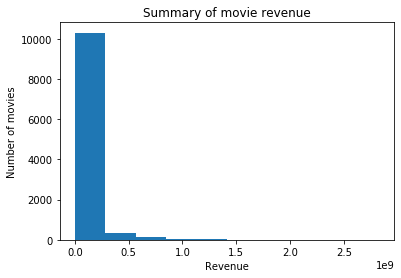

In [109]:
plt.hist(df.revenue_adj)
plt.xlabel('Revenue')
plt.ylabel('Number of movies')
plt.title('Summary of movie revenue');
df.revenue_adj.describe()

count    10842.000000
mean         0.647461
std          1.001032
min          0.000065
25%          0.208210
50%          0.384532
75%          0.715393
max         32.985763
Name: popularity, dtype: float64

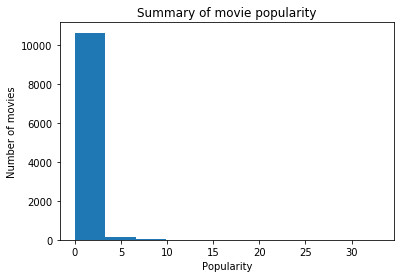

In [110]:
plt.hist(df.popularity)
plt.xlabel('Popularity')
plt.ylabel('Number of movies')
plt.title('Summary of movie popularity');
df.popularity.describe()

count    10842.000000
mean         5.974064
std          0.934257
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

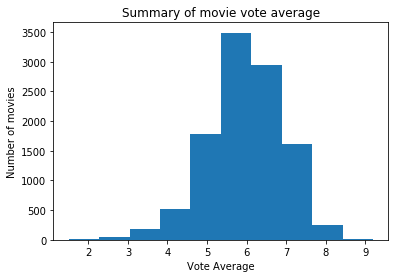

In [111]:
plt.hist(df.vote_average)
plt.xlabel('Vote Average')
plt.ylabel('Number of movies')
plt.title('Summary of movie vote average');
df.vote_average.describe()

count    10842.000000
mean       102.138443
std         31.294612
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

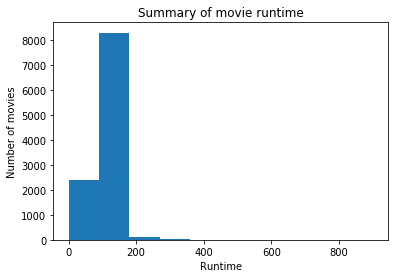

In [112]:
plt.hist(df.runtime)
plt.xlabel('Runtime')
plt.ylabel('Number of movies')
plt.title('Summary of movie runtime');
df.runtime.describe()

From the graph of revenues, popularity, vote average and runtime, most movies got revenue between 0 to 3.388e+07,
the most rated movies between 0.208 and 0.715, the highest rating score that people give are 5.4 to 6.6. Most movies are running 90 to 111 minutes.

Draw a graph to show the relationship between revenue and popularity 

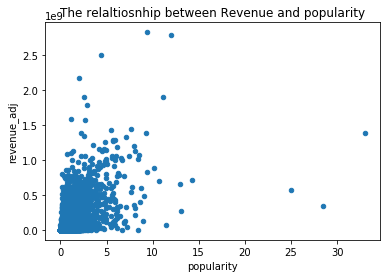

In [113]:
df.plot(x='popularity',y='revenue_adj',kind = 'scatter',title="The relaltiosnhip between Revenue and popularity");


From the graph, it is not clear to see the relationship between revenue and popularity. The popularity of movies between 0 and 5 has similar revenues, and some movies have higher revenue, which is around 2.5 than the popularity around 8. 

Draw a graph to show the relationship between revenue and runtime 

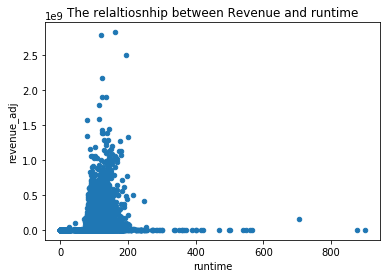

In [114]:
df.plot(x='runtime',y='revenue_adj',kind = 'scatter',title="The relaltiosnhip between Revenue and runtime");

From the graph, it is hard to see the relationship between revenue and runtime. However, we could see the runtime between 90 to 200 minutes will get higher revenues since most points in that section.     


Draw a graph to show the relationship between revenue and vote average 

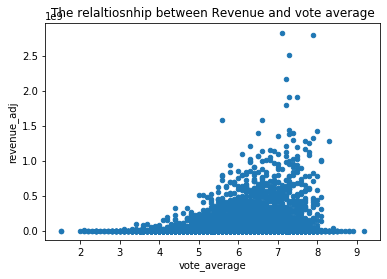

In [115]:
df.plot(x='vote_average',y='revenue_adj',kind = 'scatter',title="The relaltiosnhip between Revenue and vote average");

From the graph, there is a positive relationship between revenue and vote average, the higher rating, the higher revenues that movie earned. 


### Research Question 2 :  What kinds of properties are associated with movies that more popularity? 

Look at the first five rows of the released date columns

In [116]:
df.release_date.head()

0      6/9/15
1     5/13/15
2     3/18/15
3    12/15/15
4      4/1/15
Name: release_date, dtype: object

In [117]:
import datetime

Find each movie released a month and add a new column called month

In [118]:
df['month'] = pd.DatetimeIndex(df['release_date']).month

Convert month columns to int

In [119]:
df.month.astype(int)

0         6
1         5
2         3
3        12
4         4
         ..
10861     6
10862    12
10863     1
10864    11
10865    11
Name: month, Length: 10842, dtype: int64

In [120]:
df.head()

,id,popularity,runtime,genres,release_date,vote_average,revenue_adj,month
0,135397,32.985763,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,1.392446e+09,6
1,76341,28.419936,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,3.481613e+08,5
2,262500,13.112507,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2.716190e+08,3
3,140607,11.173104,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,1.902723e+09,12
4,168259,9.335014,137,Action|Crime|Thriller,4/1/15,7.3,1.385749e+09,4


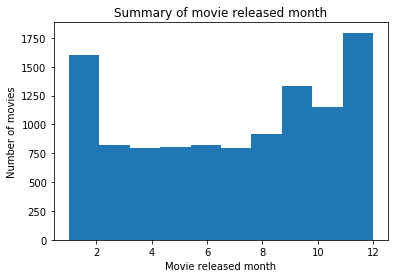

In [121]:
plt.hist(df.month)
plt.xlabel('Movie released month')
plt.ylabel('Number of movies')
plt.title('Summary of movie released month');


From the graph, More than 1500 movies released in January and December. 

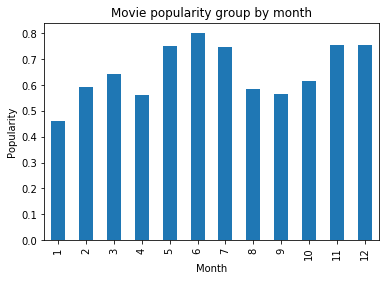

In [122]:
x = df.groupby(['month']).popularity.mean().plot(kind='bar',title = 'Movie popularity group by month');
x.set_xlabel("Month");
x.set_ylabel("Popularity");

The graph shows the movies released in June got the highest popularity, and movies released in April got the lowest popularity. The graph also shows there looks like seasonal popularity.

Divided realese date into four season

In [123]:
spring = df.query('month < 4')
summer = df.query('month < 7')
fall = df.query('month < 10')
winter = df.query('month < 13')

Get mean popularity for the four season to see the difference

In [124]:
spring.popularity.mean(),summer.popularity.mean(),fall.popularity.mean(),winter.popularity.mean()

(0.5601904249174917, 0.6333768467559205, 0.6278848473224475, 0.647460591311566)

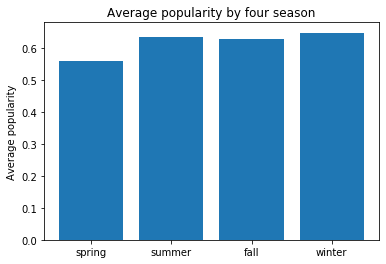

In [125]:
#Create a bar chat to show the popularity among four seasons
heights = [spring.popularity.mean(),summer.popularity.mean(),fall.popularity.mean(),winter.popularity.mean()]
labels = ['spring','summer','fall','winter']
fig = plt.figure(figsize = (6,4))
plt.bar(labels,heights,align='center')
plt.title('Average popularity by four season')
plt.xticks(labels)
plt.ylabel('Average popularity');

From the graph, we could see except the movies released in spring. There is no difference in the popularity of the movies. Winter movies have little higher popularity than other seasons.  


In [126]:
df.genres.value_counts()

Drama                                     712
Comedy                                    712
Documentary                               312
Drama|Romance                             289
Comedy|Drama                              280
                                         ... 
Action|Adventure|Comedy|Thriller|Crime      1
Mystery|Drama|Science Fiction|Thriller      1
Action|Adventure|Crime|Drama|Romance        1
Drama|Crime|War                             1
Comedy|Family|Western                       1
Name: genres, Length: 2039, dtype: int64

Since there are too many genres of the movie cover in this dataset, we only focus on these genres: action, comedies, drama, romantic, adventure, musical, historical, horror, family, war, and documentary in this report.  


In [127]:
def func(df,colname,genrename):
    genre = df[df[colname].str.contains(genrename)]
    return genre

In [128]:
Action = func(df,'genres','Action')
Comedies = func(df,'genres','Comedy')
Drama = func(df,'genres','Drama')
Romantic = func(df,'genres','Romance')
Adventure = func(df,'genres','Adventure')
Musical = func(df,'genres','Music')
Historial = func(df,'genres','Historial')
Horror = func(df,'genres','Horror')
Family = func(df,'genres','Family')
War = func(df,'genres','War')
Documentary= func(df,'genres','Documentary')

Calculated the mean popularity for different genres to see the difference

In [129]:
mean=[Action.popularity.mean(),Comedies.popularity.mean(),Drama.popularity.mean(),Romantic.popularity.mean(),Adventure.popularity.mean(),Musical.popularity.mean(),Historial.popularity.mean(),Horror.popularity.mean(),Family.popularity.mean(),War.popularity.mean(),Documentary.popularity.mean()]
mean


[0.9262744358221464,
 0.5926073422093315,
 0.5914953182773112,
 0.5920820490654203,
 1.1542590441876273,
 0.4873211838235293,
 nan,
 0.46535663042150216,
 0.7866683939886273,
 0.7276831481481484,
 0.18143162500000012]

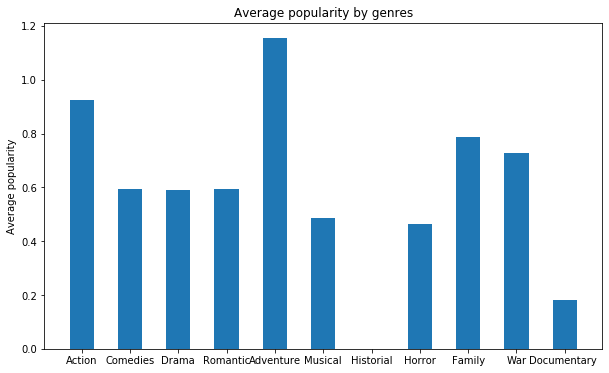

In [130]:
mean=[Action.popularity.mean(),Comedies.popularity.mean(),Drama.popularity.mean(),Romantic.popularity.mean(),Adventure.popularity.mean(),Musical.popularity.mean(),Historial.popularity.mean(),Horror.popularity.mean(),Family.popularity.mean(),War.popularity.mean(),Documentary.popularity.mean()]
genre = ['Action','Comedies','Drama','Romantic','Adventure','Musical','Historial','Horror','Family','War','Documentary ']
fig = plt.figure(figsize = (10,6))
plt.bar(genre,mean,align='center',width = 0.5)
plt.title('Average popularity by genres')
plt.xticks(genre)
plt.ylabel('Average popularity')
plt.show()

From the graph, we could see Adventure movies are most popular after that are Action, Family and War. There is no data on Historial.
    

Most movies' runtime is between 75 and 210 minutes. I will divide movies into three groups. Short movies are under 75 movies, typical movies between 75 to 120 minutes and long movies for more than 120 minutes.

In [131]:
short = df.runtime <75
typical = df.runtime <=210
long = df.runtime > 210

Check the mean of popularity with different length of movies.

In [132]:
df.popularity[short].mean(),df.popularity[typical].mean(),df.popularity[long].mean()

(0.34953925050100215, 0.6494431151205936, 0.3027572580645161)

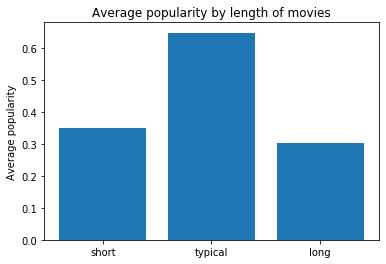

In [133]:
#Create a bar chat to show the popularity among three length of movies
heights = [df.popularity[short].mean(),df.popularity[typical].mean(),df.popularity[long].mean()]
labels = ['short','typical','long']
fig = plt.figure(figsize = (6,4))
plt.bar(labels,heights,align='center')
plt.title('Average popularity by length of movies')
plt.xticks(labels)
plt.ylabel('Average popularity');

From the graph, we could see most people would like to see the movie between 75 and 210 minutes. The movie less than 75 minutes is more popular than the movie longer than 210 minutes. 


<a id='conclusions'></a>
## Conclusions


This report evaluates the relationship between revenue and popularity, runtime, vote average and the properties are associated with movies that have more popularity from TMDb movies dataset. We found it is hard to see that one movie can get high revenues when it has a high popularity. However, the movie runtime from 75 to 210 minutes can get more revenues than others. Also, when the rating of vote averaging is higher, the higher revenue of the movie got. In general, we could say that there is a positive relationship between vote average and revenue. It is not clear to see the relationship between revenue and popularity, the runtime of the movie. A movie wants to get more popularity, it can be an adventure movie released in June, runtime between 75 to 210 minutes. From the previous section, we found that movies released movies between Jan to March have lower popularity than other seasons. The movies released in June and December got the highest popularity. People more interested in Adventure movies, after that, are action, family and war movies.  

This report limited by the availability of data and does not report the effects of other factors on popularity like directors and casts. Some people would like to watch a movie because of the directors and casts. Lastly, we did not access all the genres of the movies, because it is hard to list all the genres in the dataset. This may impact the popularity rank of movie genres.
 